In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**LOAD DỮ LIỆU**

In [2]:
from sklearn.datasets import load_iris

# Thực hiện load dữ liệu
iris_data = load_iris()

print('first 10 inputs:')
print(iris_data.data[:10])
print('first 10 ouput(label):')
print(iris_data.target[:10])

first 10 inputs:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
first 10 ouput(label):
[0 0 0 0 0 0 0 0 0 0]


**TIỀN XỬ LÝ DỮ LIỆU VÀ CHIA DỮ LIỆU TRAIN, TEST**

In [5]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

# gán input vào biến x
x= iris_data.data
# gán output vô biến y
y = iris_data.target.reshape(-1,1)

# thực hiện onehot transform
encoder = OneHotEncoder(sparse= False)
y = encoder.fit_transform(y)
print("output after transform")
print(y)

# Chia dữ liệu train, test với tỷ lệ 80% cho train và 20% cho test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.20)

output after transform
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


**CÀI ĐẶT MẠNG NƠ RON**

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Khai báo model
model = Sequential()

model.add(Dense(128, input_shape=(4,), activation='relu', name='layer1'))
model.add(Dense(128, activation='relu', name='layer2'))
model.add(Dense(3, activation='softmax', name='output'))

# Cài đặt hàm tối ưu Adam
optimizer = Adam()
model.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# In cấu trúc mạng ra màn hình
print('Detail of network: ')
print(model.summary())

Detail of network: 
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 128)               640       
                                                                 
 layer2 (Dense)              (None, 128)               16512     
                                                                 
 output (Dense)              (None, 3)                 387       
                                                                 
Total params: 17539 (68.51 KB)
Trainable params: 17539 (68.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


**TRAIN MODEL VÀ EVALUATE TRÊN TẬP TEST**

In [9]:
# Train model
model.fit(x_train, y_train, batch_size=32, epochs=10)

# Kiểm tra trên tập test
results = model.evaluate(x_test, y_test)

print('Test loss: {:4f}'.format(results[0]))
print('Test accuracy: {:4f}'.format(results[1]))

Epoch 1/10
4/4 [==============================] - 1s 9ms/step - loss: 1.1789 - accuracy: 0.3167
Epoch 2/10
4/4 [==============================] - 0s 5ms/step - loss: 0.9115 - accuracy: 0.6000
Epoch 3/10
4/4 [==============================] - 0s 5ms/step - loss: 0.8166 - accuracy: 0.7333
Epoch 4/10
4/4 [==============================] - 0s 5ms/step - loss: 0.7333 - accuracy: 0.6583
Epoch 5/10
4/4 [==============================] - 0s 5ms/step - loss: 0.6703 - accuracy: 0.6583
Epoch 6/10
4/4 [==============================] - 0s 5ms/step - loss: 0.6169 - accuracy: 0.6667
Epoch 7/10
4/4 [==============================] - 0s 5ms/step - loss: 0.5624 - accuracy: 0.7667
Epoch 8/10
4/4 [==============================] - 0s 6ms/step - loss: 0.5229 - accuracy: 0.8917
Epoch 9/10
4/4 [==============================] - 0s 6ms/step - loss: 0.4929 - accuracy: 0.9000
Epoch 10/10
1/1 [==============================] - 0s 227ms/step - loss: 0.4645 - accuracy: 0.9667
Test loss: 0.464493
Test accuracy: 0.

**VẼ ĐỒ THỊ LOSS VÀ ACCURACY**

Epoch 1/200
4/4 [==============================] - 0s 85ms/step - loss: 0.4445 - accuracy: 0.8667 - val_loss: 0.4370 - val_accuracy: 0.9333
Epoch 2/200
4/4 [==============================] - 0s 18ms/step - loss: 0.4201 - accuracy: 0.9250 - val_loss: 0.4255 - val_accuracy: 1.0000
Epoch 3/200
4/4 [==============================] - 0s 13ms/step - loss: 0.4052 - accuracy: 0.9500 - val_loss: 0.4026 - val_accuracy: 1.0000
Epoch 4/200
4/4 [==============================] - 0s 12ms/step - loss: 0.3850 - accuracy: 0.9667 - val_loss: 0.3996 - val_accuracy: 0.9333
Epoch 5/200
4/4 [==============================] - 0s 12ms/step - loss: 0.3688 - accuracy: 0.9750 - val_loss: 0.3700 - val_accuracy: 1.0000
Epoch 6/200
4/4 [==============================] - 0s 18ms/step - loss: 0.3539 - accuracy: 0.9500 - val_loss: 0.3481 - val_accuracy: 1.0000
Epoch 7/200
4/4 [==============================] - 0s 12ms/step - loss: 0.3362 - accuracy: 0.9583 - val_loss: 0.3434 - val_accuracy: 1.0000
Epoch 8/200
4/4 [===

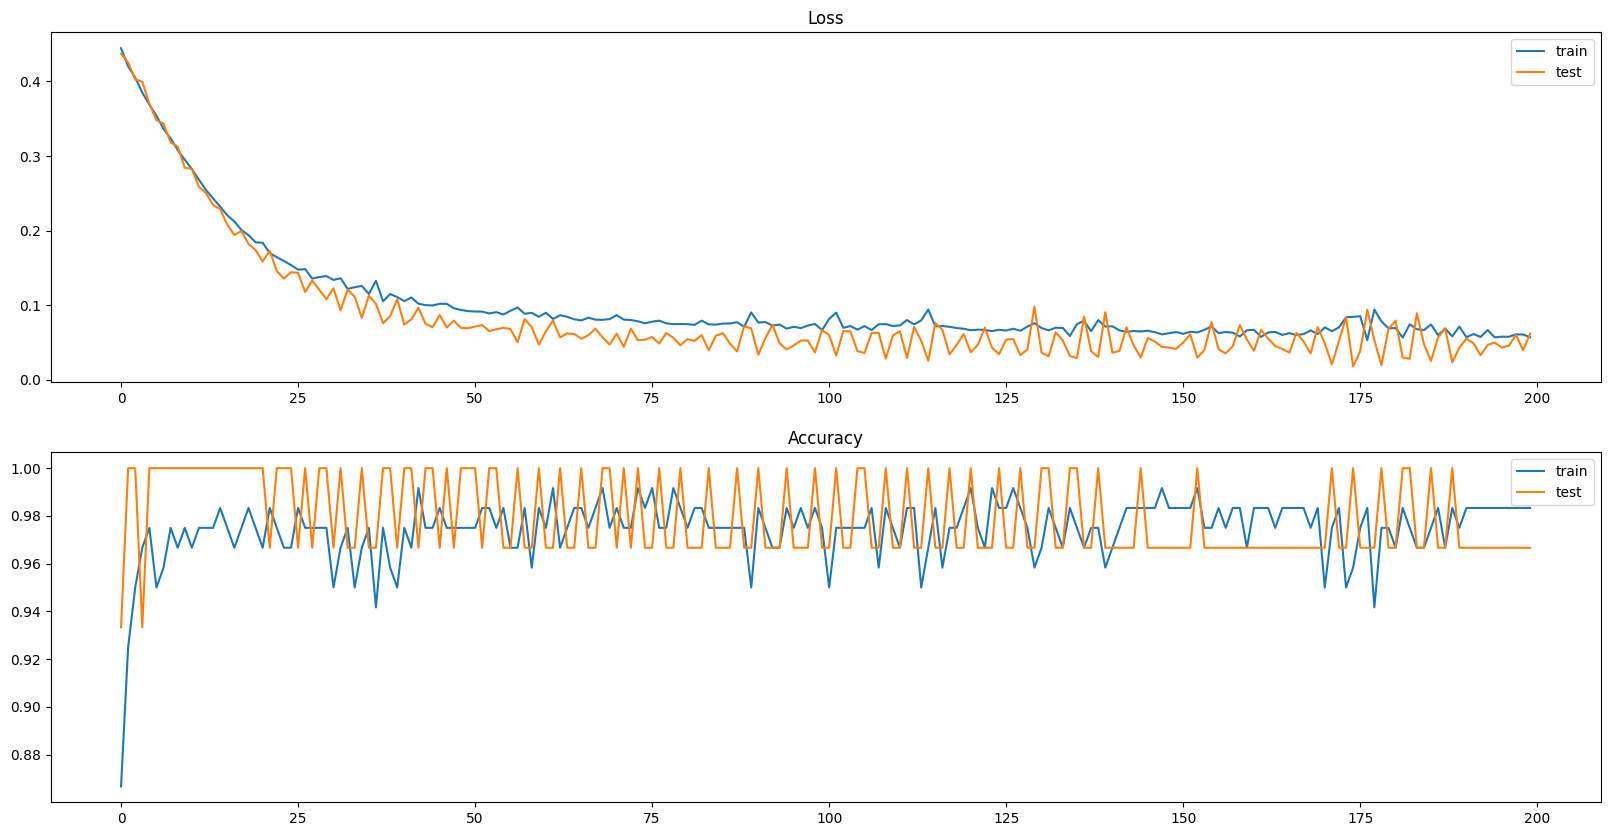

In [11]:
# Train model
import matplotlib.pyplot as pyplot
history = model.fit(x_train, y_train, batch_size=32, epochs=200,validation_data=(x_test,y_test))

# plot loss và accuracy
pyplot.figure(figsize=(20,10))
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()

# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

**TÍNH TOÁN CONFUSION MATIRIX, PRECISION, RECALL VÀ F1-SCORE**

In [13]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
import numpy as np

y_hat = model.predict(x_test)
y_pred = np.argmax(y_hat, axis=1)
y_test_label =  np.argmax(y_test, axis=1)


# Tính accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test_label, y_pred)
print('Accuracy: %f' % accuracy)
# Tính precision tp / (tp + fp)
precision = precision_score(y_test_label, y_pred, average='macro')
print('Precision: %f' % precision)
# Tính recall: tp / (tp + fn)
recall = recall_score(y_test_label, y_pred, average='macro')
print('Recall: %f' % recall)
# Tính f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test_label, y_pred, average='macro')
print('F1 score: %f' % f1)
# Tính Area under ROC
auc = roc_auc_score(y_test, y_hat, multi_class='ovr')
print('ROC AUC: %f' % auc)
# Tính confusion matrix
matrix = confusion_matrix(y_test_label, y_pred)
print(matrix)

1/1 [==============================] - 0s 86ms/step
Accuracy: 0.966667
Precision: 0.966667
Recall: 0.972222
F1 score: 0.967963
ROC AUC: 1.000000
[[ 9  0  0]
 [ 0  9  0]
 [ 0  1 11]]


<Axes: >

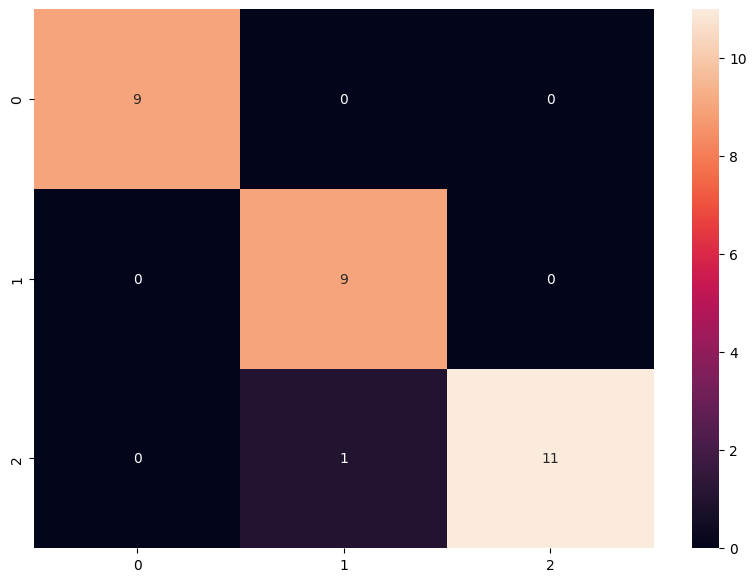

In [14]:
import pandas as pd
import seaborn as sn
df_cm = pd.DataFrame(matrix, index = [i for i in "012"],
                  columns = [i for i in "012"])
pyplot.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)